# Self-organizing map CASO PRÁCTICO


In [1]:
from google.colab import drive
drive.mount("/content/drive")

%cd "/content/drive/MyDrive/deeplearning-az/Notebooks/Part 4 - Self Organizing Maps (SOM)"

Mounted at /content/drive
/content/drive/MyDrive/deeplearning-az/Notebooks/Part 4 - Self Organizing Maps (SOM)


## Importar las librerías


In [2]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from sklearn.preprocessing import MinMaxScaler, StandardScaler
from minisom import MiniSom  # alternativa --> pip install minisom
from pylab import bone, pcolor, colorbar, plot, show
from keras.models import Sequential
from keras.layers import Dense

## Parte 1 - Identificar los fraudes potenciales con un SOM


### Importar el dataset


In [3]:
dataset = pd.read_csv("Credit_Card_Applications.csv")
X = dataset.iloc[:, :-1].values
y = dataset.iloc[:, -1].values

### Escalado de características

In [4]:
scaler = MinMaxScaler(feature_range=(0, 1))
X = scaler.fit_transform(X)

### Entrenar el SOM

In [5]:
som = MiniSom(x=10, y=10, input_len=15, sigma=1.0, learning_rate=0.5)
som.random_weights_init(X)
som.train_random(data=X, num_iteration=100)

### Visualizar los resultados


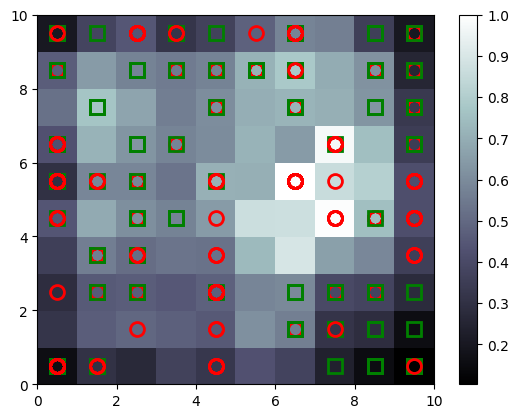

In [6]:
bone()
pcolor(som.distance_map().T)
colorbar()
markers = ["o", "s"]
colors = ["r", "g"]
for i, x in enumerate(X):
    w = som.winner(x)
    plot(w[0]+0.5, w[1]+0.5,
         markers[y[i]], markeredgecolor=colors[y[i]], markerfacecolor="None",
         markersize=10, markeredgewidth=2)
show()

### Encontrar los fraudes

In [7]:
mappings = som.win_map(X)
frauds = np.concatenate((mappings[(6,5)], mappings[(7,6)], mappings[(7,4)]), axis=0)
frauds = scaler.inverse_transform(frauds)

## Parte 2 - Trasladar el modelo de Deep Learning de no supervisado a supervisado


### Crear la matriz de características


In [8]:
customers = dataset.iloc[:, 1:-1].values

### Crear la variable dependiente

In [9]:
is_fraud = np.zeros(len(dataset))
for i in range(len(dataset)):
    if dataset.iloc[i, 0] in frauds:
        is_fraud[i] = 1

### Escalado de variables


In [10]:
scaler = StandardScaler()
customers = scaler.fit_transform(customers)

## Parte 3 - Construir la RNA


In [13]:
classifier = Sequential()
classifier.add(
    Dense(units=2,
          kernel_initializer="uniform",
          activation="relu",
          input_dim=14)
)
classifier.add(
    Dense(units=1,
          kernel_initializer="uniform",
          activation="sigmoid")
)
classifier.compile(
    optimizer="adam",
    loss="binary_crossentropy",
    metrics=["accuracy"]
)

In [14]:
classifier.fit(customers, is_fraud, batch_size=1, epochs=25)

Epoch 1/25
690/690 [==============================] - 2s 2ms/step - loss: 0.4868 - accuracy: 0.9319
Epoch 2/25
690/690 [==============================] - 1s 2ms/step - loss: 0.2173 - accuracy: 0.9319
Epoch 3/25
690/690 [==============================] - 2s 3ms/step - loss: 0.1599 - accuracy: 0.9319
Epoch 4/25
690/690 [==============================] - 2s 3ms/step - loss: 0.1411 - accuracy: 0.9319
Epoch 5/25
690/690 [==============================] - 2s 3ms/step - loss: 0.1324 - accuracy: 0.9319
Epoch 6/25
690/690 [==============================] - 1s 2ms/step - loss: 0.1260 - accuracy: 0.9319
Epoch 7/25
690/690 [==============================] - 1s 2ms/step - loss: 0.1209 - accuracy: 0.9319
Epoch 8/25
690/690 [==============================] - 1s 2ms/step - loss: 0.1164 - accuracy: 0.9319
Epoch 9/25
690/690 [==============================] - 1s 2ms/step - loss: 0.1124 - accuracy: 0.9319
Epoch 10/25
690/690 [==============================] - 1s 2ms/step - loss: 0.1087 - accuracy: 0.9319

### Predicción de los resultados de fraude

In [15]:
y_pred = classifier.predict(customers)
y_pred = np.concatenate((dataset.iloc[:, 0:1].values, y_pred), axis=1)
y_pred = y_pred[y_pred[:, 1].argsort()]

22/22 [==============================] - 0s 2ms/step
